In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
from tensorflow.keras.layers import Input,Lambda,Flatten,Dense
from tensorflow.keras.models import Sequential,Model
import numpy as np
import pandas as pd
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from glob import glob


In [3]:
IMAGE_SIZE = [224,224]

train_path = r"C:\Users\Mayank.Yogi\Desktop\Data Trained\Heroku\tomato\datasets\tomato\train"
valid_path = r"C:\Users\Mayank.Yogi\Desktop\Data Trained\Heroku\tomato\datasets\tomato\val"

In [5]:
#inception = InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

vgg = VGG16(input_shape = IMAGE_SIZE+[3],weights = 'imagenet',include_top=False)

58892288/58889256 [==============================] - 1790s 30us/step


In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
folders = glob(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\Heroku\tomato\datasets\tomato\train\*")

In [9]:
folders

['C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___Bacterial_spot',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___Early_blight',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___healthy',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___Late_blight',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___Leaf_Mold',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___Septoria_leaf_spot',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\datasets\\tomato\\train\\Tomato___Target_Spot',
 'C:\\Users\\Mayank.Yogi\\Desktop\\Data Trained\\Heroku\\tomato\\d

In [10]:
x = Flatten()(vgg.output)

In [11]:
prediction = Dense(len(folders),activation='softmax')(x)

In [13]:
model = Model(inputs=vgg.input,outputs = prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
training_set =  train_datagen.flow_from_directory(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\Heroku\tomato\datasets\tomato\train",
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 9997 images belonging to 10 classes.


In [18]:
test_set =  test_datagen.flow_from_directory(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\Heroku\tomato\datasets\tomato\val",
                                                  target_size = (224,224),
                                                  batch_size = 32,
                                                  class_mode = 'categorical')

Found 984 images belonging to 10 classes.


In [19]:
r = model.fit_generator(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 313 steps, validate for 31 steps
Epoch 1/10
313/313 [==============================] - 1857s 6s/step - loss: 0.8704 - accuracy: 0.7119 - val_loss: 0.6444 - val_accuracy: 0.7866
Epoch 2/10
313/313 [==============================] - 1293s 4s/step - loss: 0.4478 - accuracy: 0.8459 - val_loss: 0.6103 - val_accuracy: 0.8069
Epoch 3/10
313/313 [==============================] - 1316s 4s/step - loss: 0.3701 - accuracy: 0.8746 - val_loss: 0.7979 - val_accuracy: 0.7795
Epoch 4/10
313/313 [==============================] - 1381s 4s/step - loss: 0.3337 - accuracy: 0.8875 - val_loss: 0.4931 - val_accuracy: 0.8526
Epoch 5/10
313/313 [==============================] - 1309s 4s/step - loss: 0.2551 - accuracy: 0.9139 - val_loss: 0.4654 - val_accuracy: 0.8577
Epoch 6/10
313/313 [==============================] - 1336s 4s/step - loss: 0.2546 - accuracy: 0.9116 - val_los

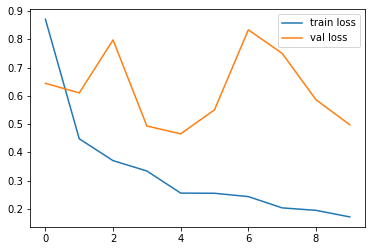

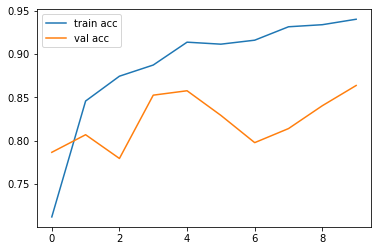

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [21]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('tomato.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred

array([[2.1599508e-03, 2.8653913e-05, 1.0428128e-05, ..., 9.9776208e-01,
        3.1623835e-11, 3.9759099e-11],
       [4.6692958e-07, 1.9179297e-05, 4.0675743e-09, ..., 4.3934114e-12,
        1.8188031e-08, 9.8451828e-06],
       [1.4192753e-10, 1.5411313e-05, 9.3728019e-08, ..., 8.1645267e-11,
        3.5499447e-11, 4.8563346e-02],
       ...,
       [2.1466006e-04, 4.2173317e-01, 5.7610631e-01, ..., 2.3202473e-04,
        8.1500383e-13, 1.0449539e-08],
       [2.1814495e-04, 3.4924371e-03, 1.3384858e-05, ..., 1.3613221e-01,
        8.4243929e-06, 5.5583360e-10],
       [1.3018002e-11, 4.7003769e-07, 1.0019478e-10, ..., 2.7957543e-09,
        6.0083106e-12, 9.9951351e-01]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 6, 6, 0, 0, 5, 2, 1, 0, 5, 4, 5, 5, 9, 8, 2, 5, 1, 1, 9, 6, 4,
       3, 0, 1, 8, 0, 7, 3, 6, 1, 4, 5, 2, 1, 9, 0, 9, 9, 3, 8, 6, 4, 0,
       2, 4, 3, 1, 3, 6, 9, 3, 5, 4, 6, 7, 7, 9, 4, 9, 9, 6, 2, 6, 6, 5,
       3, 4, 7, 3, 2, 5, 3, 8, 3, 5, 4, 1, 8, 2, 2, 6, 4, 0, 4, 3, 2, 3,
       5, 3, 7, 2, 5, 5, 2, 0, 5, 9, 4, 6, 5, 3, 4, 0, 7, 9, 3, 2, 7, 5,
       4, 7, 6, 7, 5, 1, 9, 4, 8, 8, 4, 3, 8, 8, 9, 8, 2, 1, 1, 5, 8, 8,
       7, 4, 6, 1, 3, 4, 6, 1, 1, 2, 2, 3, 9, 2, 3, 8, 8, 7, 8, 0, 4, 3,
       2, 5, 2, 9, 3, 1, 5, 7, 3, 1, 3, 7, 9, 0, 3, 1, 1, 0, 9, 7, 5, 9,
       6, 5, 6, 1, 6, 5, 3, 2, 8, 9, 1, 8, 0, 5, 3, 8, 8, 0, 9, 8, 3, 5,
       0, 7, 7, 8, 2, 8, 1, 9, 0, 5, 9, 9, 9, 1, 2, 9, 9, 9, 0, 7, 3, 1,
       2, 6, 8, 8, 6, 0, 8, 7, 1, 6, 2, 2, 5, 0, 6, 5, 5, 3, 7, 8, 0, 2,
       8, 7, 0, 9, 9, 0, 5, 8, 0, 0, 2, 4, 8, 0, 6, 0, 7, 8, 4, 5, 6, 5,
       0, 9, 8, 2, 5, 6, 1, 9, 5, 2, 2, 8, 3, 0, 0, 7, 7, 5, 5, 8, 4, 6,
       5, 7, 3, 8, 2, 5, 0, 9, 9, 3, 4, 4, 1, 5, 5,

In [25]:
from tensorflow.keras.models import load_model

In [26]:
model=load_model(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\Heroku\tomato\tomato.h5")

In [27]:
img=image.load_img(r"C:\Users\Mayank.Yogi\Desktop\Data Trained\Heroku\tomato\datasets\tomato\val\Tomato___Tomato_Yellow_Leaf_Curl_Virus\1af07f2b-027b-4792-80c5-2c20a4ed538c___YLCV_NREC 0179.JPG",target_size=(224,224))

In [28]:
x=image.img_to_array(img)
x


array([[[128., 112., 115.],
        [127., 111., 114.],
        [127., 111., 114.],
        ...,
        [128., 112., 115.],
        [142., 126., 129.],
        [145., 129., 132.]],

       [[119., 103., 106.],
        [122., 106., 109.],
        [115.,  99., 102.],
        ...,
        [143., 127., 130.],
        [151., 135., 138.],
        [158., 142., 145.]],

       [[118., 102., 105.],
        [125., 109., 112.],
        [118., 102., 105.],
        ...,
        [159., 143., 146.],
        [148., 132., 135.],
        [152., 136., 139.]],

       ...,

       [[154., 139., 144.],
        [141., 126., 131.],
        [109.,  94.,  99.],
        ...,
        [140., 123., 129.],
        [134., 117., 123.],
        [150., 133., 139.]],

       [[113.,  98., 103.],
        [116., 101., 106.],
        [103.,  88.,  93.],
        ...,
        [140., 123., 129.],
        [135., 118., 124.],
        [168., 151., 157.]],

       [[128., 113., 118.],
        [134., 119., 124.],
        [153., 1

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[4.6429950e-11, 9.1767329e-24, 9.8939937e-01, 1.7780396e-03,
        6.8224911e-03, 1.8657994e-21, 1.1372740e-12, 3.9868717e-10,
        2.0001088e-03, 3.7853513e-32]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
a

array([2], dtype=int64)